In [ ]:
%load_ext autoreload
"""
This cell does the initial project setup.
If you start a new script or notebook, make sure to copy & paste this part.

A script with this code uses the location of the `.env` file as the anchor for
the whole project (= PROJECT_ROOT). Afterwards, code inside the `src` directory
are available for import.
"""
from pathlib import Path
import sys
from dotenv import load_dotenv, find_dotenv
load_dotenv()
PROJECT_ROOT = Path(find_dotenv()).parent
sys.path.append(str(PROJECT_ROOT.joinpath("src")))
print(f"Project root directory: {PROJECT_ROOT}")



from utils import olc_client

c = olc_client.connect(verbose=True)

Project root directory: /home/loeschef/prj/2022_Janelia_optic-lobe-connectome
Connected to https://neuprint-cns.janelia.org[cns].
Client: neuprint-python v0.1.0
User: loeschef@janelia.hhmi.org [readwrite]



In [1]:
%autoreload 2

from utils.neuroglancer_plotter import url_plotter, image_saver
#from IPython.display import Image

[WDM] - Downloading: 16.9kB [00:00, 11.1MB/s]                   


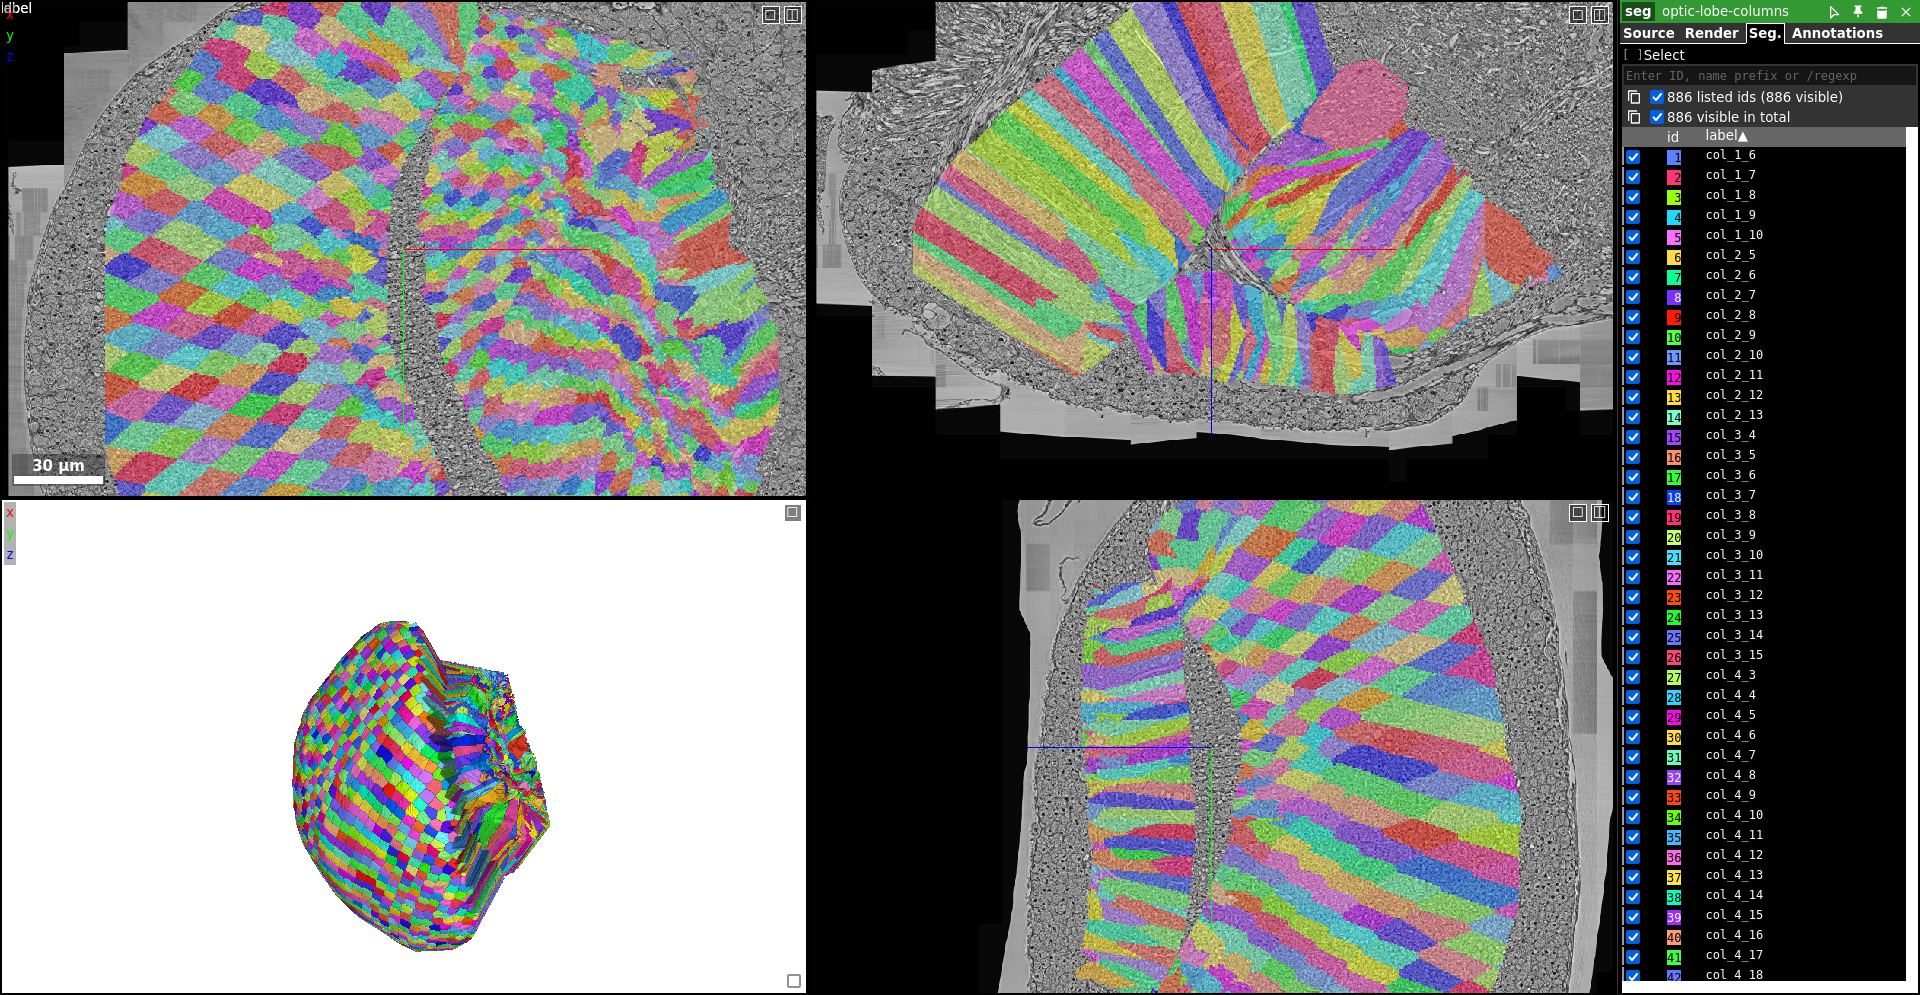

In [2]:

# url_plotter takes a neuroglancer URL and creates an image for it
rt = url_plotter(
    'https://clio-ng.janelia.org/#!gs://flyem-user-links/short/optic-lobe-columns-v0.json' # any
                    # neuroglancer URL should work here.

  ## Optional parameters:
  # , wait_sec=50   # I can't yet identify if the image has rendered completely. You have to specify
                    #   how long you want to wait. Default is 30 seconds, which works good enough 
                    #   for the default resolution in many cases.
  # , size=(3000,2000) # size of the screenshot in px. I think the maximum is around 4096×4096. The
                       #   bigger the image, the longer you need to set the `wait_sec`. The default
                       #   is 
  # , background_color="#336699"  # background color for the 3D view in HTML hex. The default is
                                  #   white ("#FFFFFF")
  # , set_3d=True  # Usually this function just plots the exact content of the neuroglancer URL.
                   #   If `set_3d` is true, it only plots the 3D view. This is more of a test if
                   #   this could work than anything else.
  ) # the function returns a PIL.Image, which can be viewed:

rt

In [3]:
data_path = PROJECT_ROOT / "results" / "screenshots"

# this saves the image
image_saver(rt # rt is the PIL image from `url_plotter`
  , 'test_image' # this is the file name for the PNG file
  , data_path    # this is the path where the file will be saved
  ## Optional parameters:
  # , replace=True # if true, overwrites the existing file. If false, it will attach a timestamp.
)   

In [4]:
## These functions are probably most useful if you use them with a collection of URLs. For example,
#    one could have a CSV file with file name, URLs, and wait times in separate columns that will
#    create this `screenshot` structure. Then the following loop will create all the screenshots
#    at any time, for example the day before publication, based on the latest data.

screenshots = {
   'optic-lobe-columns' : ["https://clio-ng.janelia.org/#!gs://flyem-user-links/short/optic-lobe-columns-v0.json", 40]
 , 'optic-lobe-layers'  : ["https://clio-ng.janelia.org/#!gs://flyem-user-links/short/optic-lobe-layers-v0.json", 20]
}

data_path = PROJECT_ROOT / "results" / "screenshots"

for name, params in screenshots.items():
    scrn = url_plotter(params[0], wait_sec=params[1], background_color='#000000')
    image_saver(scrn, name, data_path)


[WDM] - Downloading: 16.9kB [00:00, 4.68MB/s]                   
[WDM] - Downloading: 16.9kB [00:00, 8.25MB/s]                   
